# Load file and check for sheets

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
import ast

# Load the Excel sheet
xls = pd.ExcelFile('Data Insights Task.xlsx')
xls.sheet_names # list sheets in the file 

['PLAYER DATA', 'TEAM DATA']

# Convert the sheets to individual csv

In [2]:
# Load sheets
df_player = xls.parse('PLAYER DATA')
df_team = xls.parse('TEAM DATA')

# Save sheets as CSVs
df_player.to_csv('player_data.csv', index=False)
df_team.to_csv('team_data.csv', index=False)

print ("sheets saved to csv")

sheets saved to csv


# Match overview

In [3]:
df_team[['Team Name', 'Goals']]

,Team Name,Goals
0,England,2
1,Germany,0


In [4]:
# display top 5  rows for players 
df_player.head()

,Name,Team,Minutes,Primary Position,All Goals,NP Goals,xG,xG/Shot,Shots,Goal Conversion%,...,LBP Received 10m in F2,LBP Received Avg Dist in F2,LBP to Space 2m in F3,LBP to Space 5m in F3,LBP to Space 10m in F3,LBP Avg Dist in F3,LBP Received 2m in F3,LBP Received 5m in F3,LBP Received 10m in F3,LBP Received Avg Dist in F3
0,Kyle Walker,England,96,Right Centre Back,0,0,0.00,NaN,0,NaN,...,0,NaN,0,0,0,NaN,0,0,0,NaN
1,Kieran Trippier,England,96,Right Wing Back,0,0,0.00,NaN,0,NaN,...,0,5.11,1,0,0,4.02,1,1,0,5.11
2,John Stones,England,96,Centre Back,0,0,0.00,NaN,0,NaN,...,0,NaN,0,0,0,NaN,0,0,0,NaN
3,Jordan Henderson,England,7,NaN,0,0,0.00,NaN,0,NaN,...,0,NaN,0,0,0,NaN,0,0,0,NaN
4,Raheem Sterling,England,96,Left Wing,1,1,0.53,0.26,2,50.0,...,0,2.77,1,0,0,3.21,1,0,0,2.09


In [5]:
# display team 
df_team.head()

,Team Name,Games,Goal Difference,xG Difference w/Pen,NP Goal Difference,NP xG Difference,Goals,NP xG,xG/Shot,OP xG,...,Pressures F2,Pressures F2%,Counterpressures F2,Counterpressures F2%,Yellow Cards,2nd Yellows,Red Cards,Possession%,Possessions,Ball In Play Time
0,England,1,2,0.1,2,0.1,2,1.16,0.23,0.97,...,81,61,15,63,3,0,0,46,183,56.49
1,Germany,1,-2,-0.1,-2,-0.1,0,1.06,0.12,0.93,...,41,34,11,58,2,0,0,54,183,56.49


In [6]:
df_team.shape  # (number of rows, number of columns)

(2, 93)

In [7]:
df_player.shape  # (number of rows, number of columns)

(28, 191)

In [8]:
df_team.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 93 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Team Name               2 non-null      object 
 1   Games                   2 non-null      int64  
 2   Goal Difference         2 non-null      int64  
 3   xG Difference w/Pen     2 non-null      float64
 4   NP Goal Difference      2 non-null      int64  
 5   NP xG Difference        2 non-null      float64
 6   Goals                   2 non-null      int64  
 7   NP xG                   2 non-null      float64
 8   xG/Shot                 2 non-null      float64
 9   OP xG                   2 non-null      float64
 10  Own Goals               2 non-null      int64  
 11  Penalty Goals           2 non-null      int64  
 12  Shots                   2 non-null      int64  
 13  Shot Distance           2 non-null      float64
 14  Clear Shots             2 non-null      int64 

In [9]:
df_player.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 191 columns):
 #    Column                       Dtype  
---   ------                       -----  
 0    Name                         object 
 1    Team                         object 
 2    Minutes                      int64  
 3    Primary Position             object 
 4    All Goals                    int64  
 5    NP Goals                     int64  
 6    xG                           float64
 7    xG/Shot                      float64
 8    Shots                        int64  
 9    Goal Conversion%             float64
 10   Shooting%                    float64
 11   Shot Touch%                  float64
 12   Penalty Conversion%          float64
 13   PSxG                         float64
 14   Assists                      int64  
 15   xG Assisted                  float64
 16   Key Passes                   int64  
 17   OP Assists                   int64  
 18   OP xG Assisted               f

In [10]:
df_team.describe()

,Games,Goal Difference,xG Difference w/Pen,NP Goal Difference,NP xG Difference,Goals,NP xG,xG/Shot,OP xG,Own Goals,...,Pressures F2,Pressures F2%,Counterpressures F2,Counterpressures F2%,Yellow Cards,2nd Yellows,Red Cards,Possession%,Possessions,Ball In Play Time
count,2.0,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.0,...,2.000000,2.000000,2.000000,2.000000,2.000000,2.0,2.0,2.000000,2.0,2.00
mean,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.110000,0.175000,0.950000,0.0,...,61.000000,47.500000,13.000000,60.500000,2.500000,0.0,0.0,50.000000,183.0,56.49
std,0.0,2.828427,0.141421,2.828427,0.141421,1.414214,0.070711,0.077782,0.028284,0.0,...,28.284271,19.091883,2.828427,3.535534,0.707107,0.0,0.0,5.656854,0.0,0.00
min,1.0,-2.000000,-0.100000,-2.000000,-0.100000,0.000000,1.060000,0.120000,0.930000,0.0,...,41.000000,34.000000,11.000000,58.000000,2.000000,0.0,0.0,46.000000,183.0,56.49
25%,1.0,-1.000000,-0.050000,-1.000000,-0.050000,0.500000,1.085000,0.147500,0.940000,0.0,...,51.000000,40.750000,12.000000,59.250000,2.250000,0.0,0.0,48.000000,183.0,56.49
50%,1.0,0.000000,0.000000,0.000000,0.000000,1.000000,1.110000,0.175000,0.950000,0.0,...,61.000000,47.500000,13.000000,60.500000,2.500000,0.0,0.0,50.000000,183.0,56.49
75%,1.0,1.000000,0.050000,1.000000,0.050000,1.500000,1.135000,0.202500,0.960000,0.0,...,71.000000,54.250000,14.000000,61.750000,2.750000,0.0,0.0,52.000000,183.0,56.49
max,1.0,2.000000,0.100000,2.000000,0.100000,2.000000,1.160000,0.230000,0.970000,0.0,...,81.000000,61.000000,15.000000,63.000000,3.000000,0.0,0.0,54.000000,183.0,56.49


In [11]:
df_player.describe()

,Minutes,All Goals,NP Goals,xG,xG/Shot,Shots,Goal Conversion%,Shooting%,Shot Touch%,Penalty Conversion%,...,LBP Received 10m in F2,LBP Received Avg Dist in F2,LBP to Space 2m in F3,LBP to Space 5m in F3,LBP to Space 10m in F3,LBP Avg Dist in F3,LBP Received 2m in F3,LBP Received 5m in F3,LBP Received 10m in F3,LBP Received Avg Dist in F3
count,28.000000,28.000000,28.000000,28.000000,8.000000,28.000000,8.00000,8.000000,27.000000,0.0,...,28.000000,15.000000,28.000000,28.000000,28.000000,9.000000,28.000000,28.000000,28.000000,12.000000
mean,75.357143,0.071429,0.071429,0.079643,0.192500,0.500000,18.75000,54.125000,0.629630,NaN,...,0.071429,4.228667,0.392857,0.142857,0.035714,5.374444,0.857143,0.285714,0.035714,4.080833
std,34.328710,0.262265,0.262265,0.149653,0.133818,0.881917,37.20119,42.515333,1.213645,NaN,...,0.262265,2.276541,0.628890,0.356348,0.188982,3.957165,1.238706,0.599824,0.188982,2.527246
min,3.000000,0.000000,0.000000,0.000000,0.040000,0.000000,0.00000,0.000000,0.000000,NaN,...,0.000000,2.170000,0.000000,0.000000,0.000000,2.430000,0.000000,0.000000,0.000000,2.020000
25%,70.000000,0.000000,0.000000,0.000000,0.090000,0.000000,0.00000,24.750000,0.000000,NaN,...,0.000000,2.730000,0.000000,0.000000,0.000000,3.210000,0.000000,0.000000,0.000000,2.740000
50%,96.000000,0.000000,0.000000,0.000000,0.175000,0.000000,0.00000,50.000000,0.000000,NaN,...,0.000000,3.380000,0.000000,0.000000,0.000000,4.020000,0.000000,0.000000,0.000000,3.180000
75%,96.000000,0.000000,0.000000,0.120000,0.267500,1.000000,12.50000,100.000000,0.500000,NaN,...,0.000000,4.900000,1.000000,0.000000,0.000000,5.840000,1.250000,0.000000,0.000000,4.667500
max,96.000000,1.000000,1.000000,0.530000,0.440000,3.000000,100.00000,100.000000,4.000000,NaN,...,1.000000,11.150000,2.000000,1.000000,1.000000,15.300000,4.000000,2.000000,1.000000,11.150000


# Team performance comparison

In [12]:
df_team[['Team Name', 'Goals', 'NP xG', 'xG/Shot', 'Shots', 
    'Shot Distance', 'Clear Shots', 'High Press Shots',
    'Possession%', 'Ball In Play Time', 
    'Passing%', 'Dribbles', 'Dribble%', 'Deep Completions']]
# metrics to check each teams performance 

,Team Name,Goals,NP xG,xG/Shot,Shots,Shot Distance,Clear Shots,High Press Shots,Possession%,Ball In Play Time,Passing%,Dribbles,Dribble%,Deep Completions
0,England,2,1.16,0.23,5,11.32,1,1,46,56.49,83,12,67,3
1,Germany,0,1.06,0.12,9,16.40,1,3,54,56.49,85,7,29,9


# Players performance

In [13]:
df_player[[
    'Name', 'Team', 'All Goals', 'Shots', 'xG', 'xG/Shot',
    'Dribbles', 'Dribble%', 
    'LBP to Space 2m in F3', 'LBP to Space 5m in F3', 'LBP to Space 10m in F3'
]]
# individul players starts i sleceted some 

,Name,Team,All Goals,Shots,xG,xG/Shot,Dribbles,Dribble%,LBP to Space 2m in F3,LBP to Space 5m in F3,LBP to Space 10m in F3
0,Kyle Walker,England,0,0,0.00,NaN,0,NaN,0,0,0
1,Kieran Trippier,England,0,0,0.00,NaN,0,NaN,1,0,0
2,John Stones,England,0,0,0.00,NaN,0,NaN,0,0,0
3,Jordan Henderson,England,0,0,0.00,NaN,0,NaN,0,0,0
4,Raheem Sterling,England,1,2,0.53,0.26,7,57.0,1,0,0
5,Luke Shaw,England,0,0,0.00,NaN,1,100.0,1,1,0
6,Harry Kane,England,1,1,0.44,0.44,1,100.0,0,0,0
7,Jack Grealish,England,0,0,0.00,NaN,0,NaN,0,0,0
8,Jordan Pickford,England,0,0,0.00,NaN,0,NaN,0,0,0
9,Kalvin Phillips,England,0,0,0.00,NaN,0,NaN,1,0,0


# Line breaking passes total

In [14]:
# column for each player
df_player['Total LBP to Space F3'] = (
    df_player['LBP to Space 2m in F3'] +
    df_player['LBP to Space 5m in F3'] +
    df_player['LBP to Space 10m in F3']
)

# group by team to get totals
team_lbp_totals = df_player.groupby('Team')['Total LBP to Space F3'].sum()
print(team_lbp_totals)

Team
England     6
Germany    10
Name: Total LBP to Space F3, dtype: int64


In [15]:
df_team[[
    'Team Name', 
    'Passes Inside Box', 
    'Deep Completions', 
    'Passing%', 
    'Successful Passes'
]]

,Team Name,Passes Inside Box,Deep Completions,Passing%,Successful Passes
0,England,2,3,83,395
1,Germany,4,9,85,470


In [16]:
# extracig goal scorers, best passers with line breaking passes, playesr with decent xg but no goal 

In [17]:
# Top scorers
df_player[['Name', 'Team', 'All Goals', 'Shots', 'xG']].sort_values(by='All Goals', ascending=False).head(5)

,Name,Team,All Goals,Shots,xG
4,Raheem Sterling,England,1,2,0.53
6,Harry Kane,England,1,1,0.44
0,Kyle Walker,England,0,0,0.00
15,Emre Can,Germany,0,0,0.00
26,Kai Havertz,Germany,0,2,0.12


In [18]:
# Total LBP to Space in Final Third
df_player['Total LBP to Space F3'] = (
    df_player['LBP to Space 2m in F3'] +
    df_player['LBP to Space 5m in F3'] +
    df_player['LBP to Space 10m in F3']
)

df_player[['Name', 'Team', 'Total LBP to Space F3']].sort_values(by='Total LBP to Space F3', ascending=False).head(5)

,Name,Team,Total LBP to Space F3
26,Kai Havertz,Germany,3
13,Serge Gnabry,Germany,3
25,Joshua Kimmich,Germany,2
5,Luke Shaw,England,2
19,Toni Kroos,Germany,2


# Defensive work and Pressing 

In [19]:
df_team[[
    'Team Name', 
    'Pressures F2', 
    'Pressures F2%', 
    'Counterpressures',
    'Counterpressures F2', 
    'Counterpressures F2%', 
    'Pressures'
]]

,Team Name,Pressures F2,Pressures F2%,Counterpressures,Counterpressures F2,Counterpressures F2%,Pressures
0,England,81,61,24,15,63,133
1,Germany,41,34,19,11,58,120


# Statsbomb Event Data insights

In [20]:
events = pd.read_csv("england_vs_germany_full_events.csv")
events.head()

,50_50,ball_receipt_outcome,ball_recovery_recovery_failure,block_deflection,carry_end_location,clearance_aerial_won,clearance_body_part,clearance_head,clearance_left_foot,clearance_right_foot,...,substitution_outcome,substitution_outcome_id,substitution_replacement,substitution_replacement_id,tactics,team,team_id,timestamp,type,under_pressure
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 343, 'lineup': [{'player': {'id'...",England,768,00:00:00.000,Starting XI,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,"{'formation': 343, 'lineup': [{'player': {'id'...",Germany,770,00:00:00.000,Starting XI,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,England,768,00:00:00.000,Half Start,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,Germany,770,00:00:00.000,Half Start,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,England,768,00:00:00.000,Half Start,NaN


In [21]:
# Show all columns
events.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 91 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   50_50                           2 non-null      object 
 1   ball_receipt_outcome            142 non-null    object 
 2   ball_recovery_recovery_failure  5 non-null      object 
 3   block_deflection                2 non-null      object 
 4   carry_end_location              774 non-null    object 
 5   clearance_aerial_won            15 non-null     object 
 6   clearance_body_part             48 non-null     object 
 7   clearance_head                  35 non-null     object 
 8   clearance_left_foot             6 non-null      object 
 9   clearance_right_foot            7 non-null      object 
 10  counterpress                    81 non-null     object 
 11  dribble_no_touch                1 non-null      object 
 12  dribble_outcome                 19

In [22]:
# 1. Filter event types
shots_off_target = events[(events['type'] == 'Shot') & (events['shot_outcome'].isin(['Off T', 'Wayward']))]
shots_saved = events[(events['type'] == 'Shot') & (events['shot_outcome'] == 'Saved')]
corners = events[(events['type'] == 'Pass') & (events['pass_type'] == 'Corner')]
fouls = events[events['type'] == 'Foul Committed']
offsides = events[events['type'] == 'Offside']

# 2. Print team-by-team breakdowns
print("Shots Off Target:")
print(shots_off_target['team'].value_counts())
print("\nShots Saved:")
print(shots_saved['team'].value_counts())
print("\nCorners:")
print(corners['team'].value_counts())
print("\nFouls Committed:")
print(fouls['team'].value_counts())
print("\nOffsides:")
print(offsides['team'].value_counts())

Shots Off Target:
team
Germany    4
England    1
Name: count, dtype: int64

Shots Saved:
team
Germany    3
England    2
Name: count, dtype: int64

Corners:
team
Germany    3
England    3
Name: count, dtype: int64

Fouls Committed:
team
Germany    13
England    12
Name: count, dtype: int64

Offsides:
Series([], Name: count, dtype: int64)


# Assist data from statsbomb

In [23]:
# Optional: convert location fields if they are strings
events['pass_end_location'] = events['pass_end_location'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# Filter: Only assists
assists = events[(events['type'] == 'Pass') & (events['pass_goal_assist'] == True)]

# Show assist metadata
assist_data = assists[[
    'player', 
    'pass_recipient', 
    'team', 
    'minute', 
    'pass_height', 
    'pass_body_part', 
    'pass_end_location',
    'shot_body_part'
]]

display(assist_data)

,player,pass_recipient,team,minute,pass_height,pass_body_part,pass_end_location,shot_body_part
899,Luke Shaw,Raheem Sterling,England,74,Ground Pass,Left Foot,"[116.1, 40.0]",NaN
979,Jack Grealish,Harry Kane,England,85,Low Pass,Left Foot,"[111.1, 40.4]",NaN


# Detailed assist timeline

In [24]:
for idx, row in assists.iterrows():
    assist_player = row['player']
    recipient = row['pass_recipient']
    team = row['team']
    minute = row['minute']
    shot_id = row['pass_assisted_shot_id']

    # Get the shot row by its ID
    shot = events[events['id'] == shot_id]
    if not shot.empty:
        shot_row = shot.iloc[0]
        shooter = shot_row['player']
        outcome = shot_row['shot_outcome']['name'] if isinstance(shot_row['shot_outcome'], dict) else "N/A"
        xg = shot_row['shot_statsbomb_xg']
        shot_minute = shot_row['minute']

        print(f"{assist_player} ({team}) assisted {shooter} in minute {shot_minute}")
        print(f"  Outcome: {outcome}")
        print(f"  xG: {xg}")
        print("---")
    else:
        print(f"No matching shot found for assist by {assist_player}")
        

Luke Shaw (England) assisted Raheem Sterling in minute 74
  Outcome: N/A
  xG: 0.4975854
---
Jack Grealish (England) assisted Harry Kane in minute 85
  Outcome: N/A
  xG: 0.43912625
---


# All shots in the game

In [25]:
# Filter all shot events
shots = events[events['type'] == 'Shot']

# Check what it looks like
shots[['player', 'team', 'minute', 'location', 'shot_outcome', 'shot_statsbomb_xg']]

,player,team,minute,location,shot_outcome,shot_statsbomb_xg
3254,Leon Goretzka,Germany,3,"[90.6, 31.2]",Saved,0.019125
3255,Kai Havertz,Germany,9,"[100.8, 44.5]",Blocked,0.060380
3256,Raheem Sterling,England,15,"[92.0, 33.3]",Saved,0.030664
3257,Harry Maguire,England,16,"[109.5, 42.6]",Saved,0.043702
3258,Harry Maguire,England,26,"[114.0, 40.9]",Off T,0.152433
3259,Timo Werner,Germany,31,"[112.7, 30.7]",Saved,0.177236
3260,Kai Havertz,Germany,47,"[102.8, 46.6]",Saved,0.056877
3261,Robin Gosens,Germany,52,"[116.0, 41.0]",Wayward,0.290408
3262,Raheem Sterling,England,74,"[114.1, 38.9]",Goal,0.497585
3263,Thomas Müller,Germany,77,"[99.1, 51.8]",Blocked,0.067969


# Plots

# Team by Team Shot Maps 

/tmp/ipykernel_1143081/4034111895.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  shots['location'] = shots['location'].apply(lambda loc: ast.literal_eval(loc) if isinstance(loc, str) else loc)
/tmp/ipykernel_1143081/4034111895.py:43: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  goal_patch = mpatches.Patch(color='white', label='* Goal', edgecolor='black')


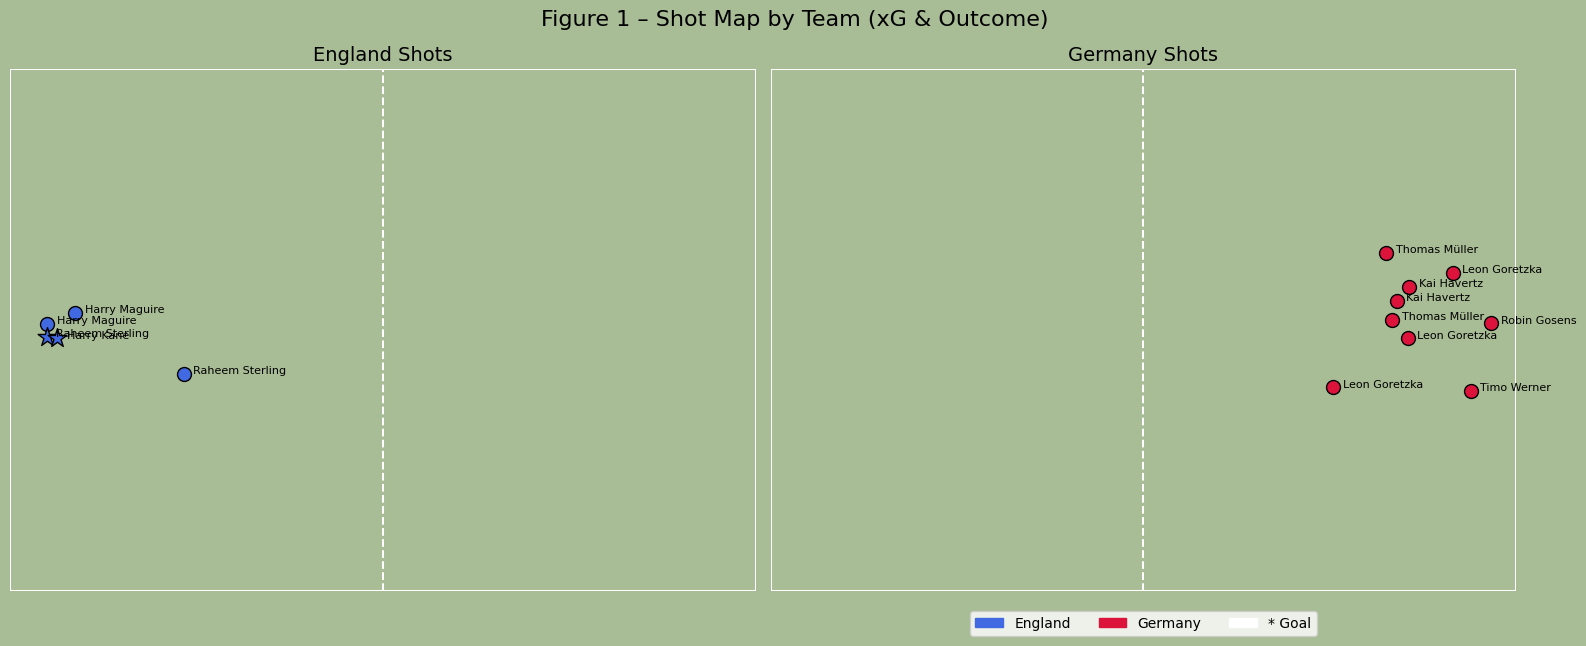

In [26]:

# Parse location strings if needed
shots['location'] = shots['location'].apply(lambda loc: ast.literal_eval(loc) if isinstance(loc, str) else loc)

# Set up side-by-side plots
fig, axes = plt.subplots(1, 2, figsize=(16, 7))
fig.patch.set_facecolor("#a8bc95")  # background green

teams = ["England", "Germany"]

for ax, team in zip(axes, teams):
    ax.set_facecolor("#a8bc95")

    # Draw pitch
    ax.plot([0, 0], [0, 80], color="white")
    ax.plot([0, 120], [80, 80], color="white")
    ax.plot([120, 120], [80, 0], color="white")
    ax.plot([120, 0], [0, 0], color="white")
    ax.plot([60, 60], [0, 80], color="white", linestyle="--")

    # Filter by team
    team_shots = shots[shots["team"] == team]

    for _, row in team_shots.iterrows():
        loc = row['location']
        if isinstance(loc, list) and len(loc) == 2:
            x, y = loc
            if team == "England":
                x = 120 - x  # mirror to left goal
            outcome = row['shot_outcome'].lower() if isinstance(row['shot_outcome'], str) else ""
            color = "royalblue" if team == "England" else "crimson"
            marker = "*" if outcome == "goal" else "o"
            size = 200 if outcome == "goal" else 100

            ax.scatter(x, y, color=color, marker=marker, s=size, edgecolor='black', zorder=3)
            ax.text(x + 1.5, y, row['player'], fontsize=8, color='black', zorder=4)

    ax.set_xlim(0, 120)
    ax.set_ylim(0, 80)
    ax.axis('off')
    ax.set_title(f"{team} Shots", fontsize=14)

# custom legend
goal_patch = mpatches.Patch(color='white', label='* Goal', edgecolor='black')
eng_patch = mpatches.Patch(color='royalblue', label='England')
ger_patch = mpatches.Patch(color='crimson', label='Germany')

plt.legend(
    handles=[eng_patch, ger_patch, goal_patch],
    loc='lower center',
    bbox_to_anchor=(0.5, -0.1),
    ncol=3,
    frameon=True,
    fontsize=10
)

plt.suptitle("Figure 1 – Shot Map by Team (xG & Outcome)", fontsize=16)
plt.tight_layout()
plt.subplots_adjust(bottom=0.15)
plt.savefig("figure_1_Shot_Map.png", dpi=300)
plt.show()

# XG Plot for Germany and England 

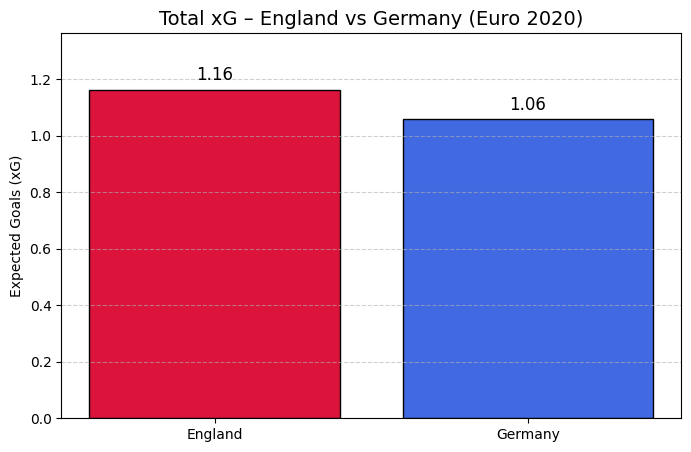

In [27]:
# Sum xG for each team
xg_totals = shots.groupby("team")["shot_statsbomb_xg"].sum().sort_values(ascending=False)

# Plot
fig, ax = plt.subplots(figsize=(8, 5))
bars = ax.bar(xg_totals.index, xg_totals.values, color=["crimson", "royalblue"], edgecolor="black")

# Label bars with xG value
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width() / 2, height + 0.02,
            f"{height:.2f}", ha="center", va="bottom", fontsize=12)

ax.set_title("Total xG – England vs Germany (Euro 2020)", fontsize=14)
ax.set_ylabel("Expected Goals (xG)")
ax.set_ylim(0, max(xg_totals.values) + 0.2)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.savefig("figure_2_xg_bar_chart.png", dpi=300)
plt.show()

# XG Timeline over 90 minutes 

,minute,team,player,shot_statsbomb_xg,shot_outcome,xG
3254,3,Germany,Leon Goretzka,0.019125,Saved,0.019125
3255,9,Germany,Kai Havertz,0.060380,Blocked,0.060380
3256,15,England,Raheem Sterling,0.030664,Saved,0.030664
3257,16,England,Harry Maguire,0.043702,Saved,0.043702
3258,26,England,Harry Maguire,0.152433,Off T,0.152433


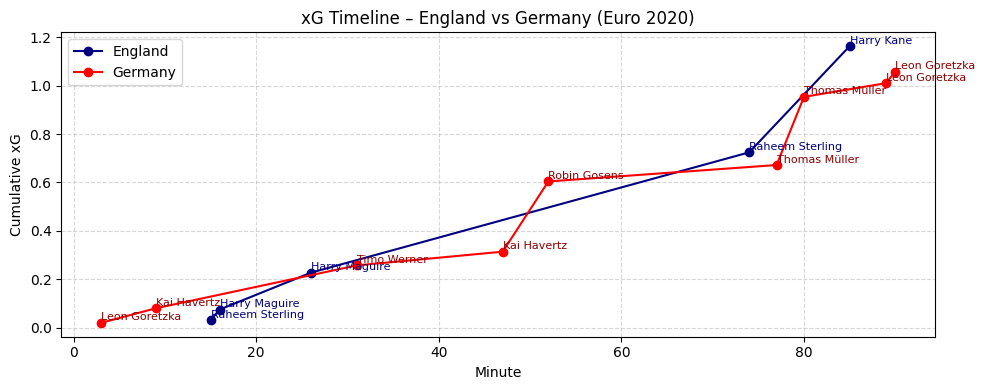

In [28]:
# Extract only Shot events with valid xG
shots = events[(events['type'] == 'Shot') & (events['shot_statsbomb_xg'].notna())].copy()

# Clean up timeline data
xg_timeline = shots[['minute', 'team', 'player', 'shot_statsbomb_xg', 'shot_outcome']].copy()
xg_timeline['xG'] = xg_timeline['shot_statsbomb_xg'].astype(float)

display(xg_timeline.head())

# Separate teams
england = xg_timeline[xg_timeline['team'] == 'England']
germany = xg_timeline[xg_timeline['team'] == 'Germany']

# Create the figure
plt.figure(figsize=(10, 4))
plt.plot(england['minute'], england['xG'].cumsum(), label='England', color='navy', marker='o')
plt.plot(germany['minute'], germany['xG'].cumsum(), label='Germany', color='red', marker='o')

# Add player name labels
for idx, row in england.iterrows():
    plt.text(row['minute'], england['xG'].cumsum().loc[idx] + 0.01, row['player'], fontsize=8, color='navy')

for idx, row in germany.iterrows():
    plt.text(row['minute'], germany['xG'].cumsum().loc[idx] + 0.01, row['player'], fontsize=8, color='darkred')

# Format
plt.title('xG Timeline – England vs Germany (Euro 2020)')
plt.xlabel('Minute')
plt.ylabel('Cumulative xG')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.tight_layout()
plt.savefig("figure_3_xg_timeline_chart.png", dpi=300)
plt.show()

# Pressure heatmaps

/tmp/ipykernel_1143081/1323124971.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  england['zone'] = england['x'].apply(get_zone)
/tmp/ipykernel_1143081/1323124971.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  germany['zone'] = germany['x'].apply(get_zone)


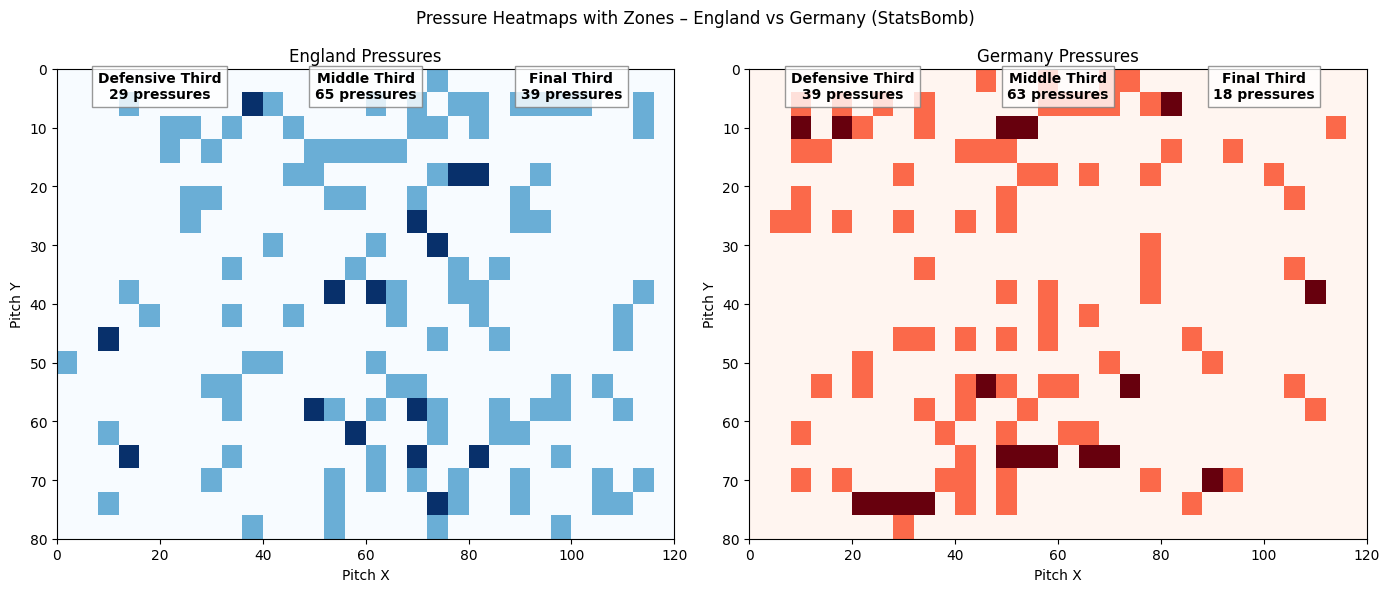

Pressure zones counted:

England: zone
Middle Third       65
Final Third        39
Defensive Third    29
Name: count, dtype: int64

Germany: zone
Middle Third       63
Defensive Third    39
Final Third        18
Name: count, dtype: int64
total pressures confirmation with excel

England pressures: 133

Germany pressures: 120


In [29]:

# 1. Filter pressure events with valid location
pressures = events[(events['type'] == 'Pressure') & (events['location'].notna())].copy()
pressures['location'] = pressures['location'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

# 2. Extract X, Y coordinates
pressures['x'] = pressures['location'].apply(lambda loc: loc[0])
pressures['y'] = pressures['location'].apply(lambda loc: loc[1])

# 3. Split by team
england = pressures[pressures['team'] == 'England']
germany = pressures[pressures['team'] == 'Germany']

# 4. Assign zones based on pitch thirds
def get_zone(x):
    if x < 40:
        return 'Defensive Third'
    elif x < 80:
        return 'Middle Third'
    else:
        return 'Final Third'

england['zone'] = england['x'].apply(get_zone)
germany['zone'] = germany['x'].apply(get_zone)

# 5. Count per zone
england_counts = england['zone'].value_counts()
germany_counts = germany['zone'].value_counts()

# 6. Plotting
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
plt.suptitle("Pressure Heatmaps with Zones – England vs Germany (StatsBomb)")

# Function to plot heatmap and annotate
def plot_heatmap(ax, team_data, title, cmap, counts):
    heat = ax.hist2d(team_data['x'], team_data['y'], bins=[30, 20], range=[[0, 120], [0, 80]], cmap=cmap)
    ax.set_title(title)
    ax.invert_yaxis()
    ax.set_xlabel('Pitch X')
    ax.set_ylabel('Pitch Y')

    # Add zone annotations
    zones = ['Defensive Third', 'Middle Third', 'Final Third']
    x_labels = [20, 60, 100]
    for zone, x in zip(zones, x_labels):
        count = counts.get(zone, 0)
        ax.text(x, 5, f"{zone}\n{count} pressures", ha='center', fontsize=10, fontweight='bold', color='black',
                bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))

# England
plot_heatmap(axes[0], england, 'England Pressures', 'Blues', england_counts)

# Germany
plot_heatmap(axes[1], germany, 'Germany Pressures', 'Reds', germany_counts)

plt.tight_layout()
plt.subplots_adjust(top=0.88)
plt.savefig("figure_4_pressure_locations_heatmap.png", dpi=300)
plt.show()

# Optional summary
print("Pressure zones counted:")
print("\nEngland:", england_counts)
print("\nGermany:", germany_counts)

print ("total pressures confirmation with excel")
print("\nEngland pressures:", len(england))
print("\nGermany pressures:", len(germany))